# 1.7 Creating Network Visualizations

## 1. Install Libraries

In [1]:
%pip install pyvis

  Using cached pyvis-0.3.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached jsonpickle-3.0.4-py3-none-any.whl.metadata (2.6 kB)
Using cached pyvis-0.3.2-py3-none-any.whl (756 kB)
Using cached jsonpickle-3.0.4-py3-none-any.whl (39 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install cdlib

  Using cached cdlib-0.4.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached demon-2.0.6-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_louvain-0.16-py3-none-any.whl
  Using cached PuLP-2.8.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached eva_lcd-0.1.1-py3-none-any.whl.metadata (731 bytes)
  Using cached bimlpa-0.1.2-py3-none-any.whl.metadata (725 bytes)
  Using cached python_igraph-0.11.5-py3-none-any.whl.metadata (2.8 kB)
  Using cached angelcommunity-2.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached pooch-1.8.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached dynetx-0.3.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached thresholdclustering-1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached python_Levenshtein-0.25.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached igraph-0.11.5-cp39-abi3-win_amd64.whl.metadata (3.9 kB)
 

In [3]:
import cdlib
print(cdlib.__version__)

0.4.0


In [4]:
!pip install igraph leidenalg

  Using cached leidenalg-0.10.2-cp38-abi3-win_amd64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-win_amd64.whl (1.6 MB)


In [5]:
import igraph
import leidenalg

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

## 2. Import the country relationships file

In [7]:
# Import relationship data
relationship_df = pd.read_csv('key_events_20th_century_relationship.csv', index_col = 0)

In [8]:
relationship_df

,source,target,value
0,France,Italy,15
1,Italy,Russia,6
2,Germany,Russia,18
3,Austria,Germany,6
4,Austria,Hungary,6
...,...,...,...
87,Denmark,France,5
88,Italy,Japan,14
89,India,Iran,5
90,Afghanistan,India,5


## 3. Create a network object from the countries relationships dataframe

In [9]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## 4. Create a static network graph using only NetworkX

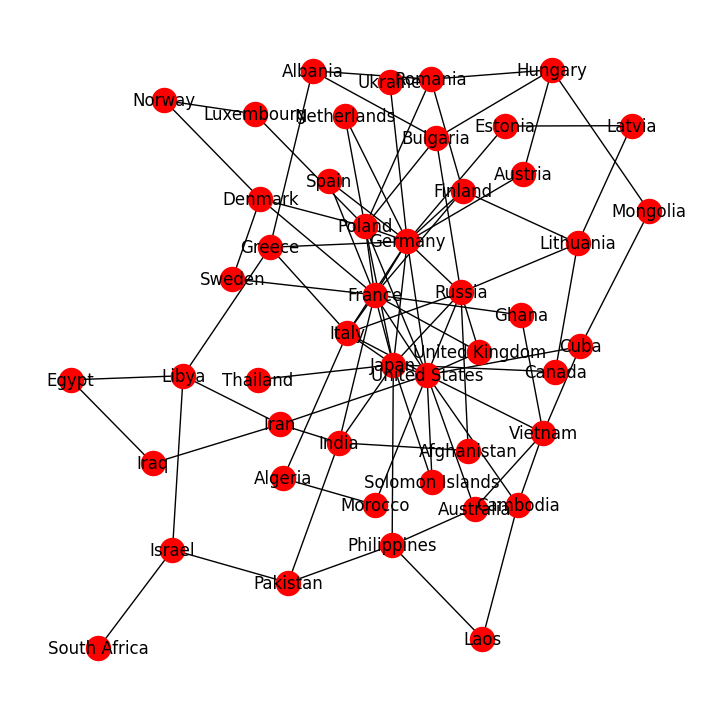

In [10]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [11]:
h.savefig('networkx_plt_20th_century.png')

## 5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [12]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


## 6. Apply the Leiden algorithm to detect any communities within the countries

In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [14]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [15]:
new_com = coms.to_node_community_map()

In [16]:
new_com

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Ukraine': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Luxembourg': [0],
             'Norway': [0],
             'Denmark': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Iran': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Afghanistan': [1],
             'Italy': [2],
             'Russia': [2],
             'United States': [2],
             'Japan': [2],
             'Morocco': [2],
             'Algeria': [2],
             'Thailand': [2],
             'Solomon Islands': [2],
             'United Kingdom': [2],
             'Philippines': [3],
             'Australia': [3],
             'Laos': [3],
             'Cambodia': [3],
      

In [17]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'France': 0,
 'Germany': 0,
 'Ukraine': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Luxembourg': 0,
 'Norway': 0,
 'Denmark': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'Iran': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Afghanistan': 1,
 'Italy': 2,
 'Russia': 2,
 'United States': 2,
 'Japan': 2,
 'Morocco': 2,
 'Algeria': 2,
 'Thailand': 2,
 'Solomon Islands': 2,
 'United Kingdom': 2,
 'Philippines': 3,
 'Australia': 3,
 'Laos': 3,
 'Cambodia': 3,
 'Vietnam': 3,
 'Ghana': 3,
 'Cuba': 3,
 'Austria': 4,
 'Hungary': 4,
 'Bulgaria': 4,
 'Greece': 4,
 'Albania': 4,
 'Romania': 4,
 'Mongolia': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Canada': 5}

## 7. Visualize the output of the communities algorithm on a new network graph and save it as HTML

In [19]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


#### An observation I can make from the visualization above is that there are some big countries that can easily be identified from the size of their dot (their dot on the graph is bigger than other countries) this could mean that these countries have a lot more relationships compared to other countries. Some of these noticable countries are France, Germany, United States, Poland, Russia, and Japan. This graph makes since because many of these countries were heavily involved in the World Wars during the 20th Century. 

## 8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise

### Degree Centrality

In [20]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.2608695652173913,
 'Italy': 0.15217391304347827,
 'Russia': 0.17391304347826086,
 'Germany': 0.2826086956521739,
 'Austria': 0.043478260869565216,
 'Hungary': 0.08695652173913043,
 'Bulgaria': 0.08695652173913043,
 'Ukraine': 0.021739130434782608,
 'United States': 0.30434782608695654,
 'Spain': 0.043478260869565216,
 'Poland': 0.19565217391304346,
 'Estonia': 0.043478260869565216,
 'Latvia': 0.043478260869565216,
 'Lithuania': 0.08695652173913043,
 'Finland': 0.08695652173913043,
 'Luxembourg': 0.043478260869565216,
 'Norway': 0.043478260869565216,
 'Denmark': 0.08695652173913043,
 'Sweden': 0.043478260869565216,
 'Greece': 0.08695652173913043,
 'Albania': 0.06521739130434782,
 'Libya': 0.08695652173913043,
 'Egypt': 0.043478260869565216,
 'Iraq': 0.043478260869565216,
 'Iran': 0.08695652173913043,
 'Japan': 0.2391304347826087,
 'Morocco': 0.043478260869565216,
 'Algeria': 0.043478260869565216,
 'Netherlands': 0.043478260869565216,
 'Thailand': 0.021739130434782608,
 'Phi

In [21]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [22]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

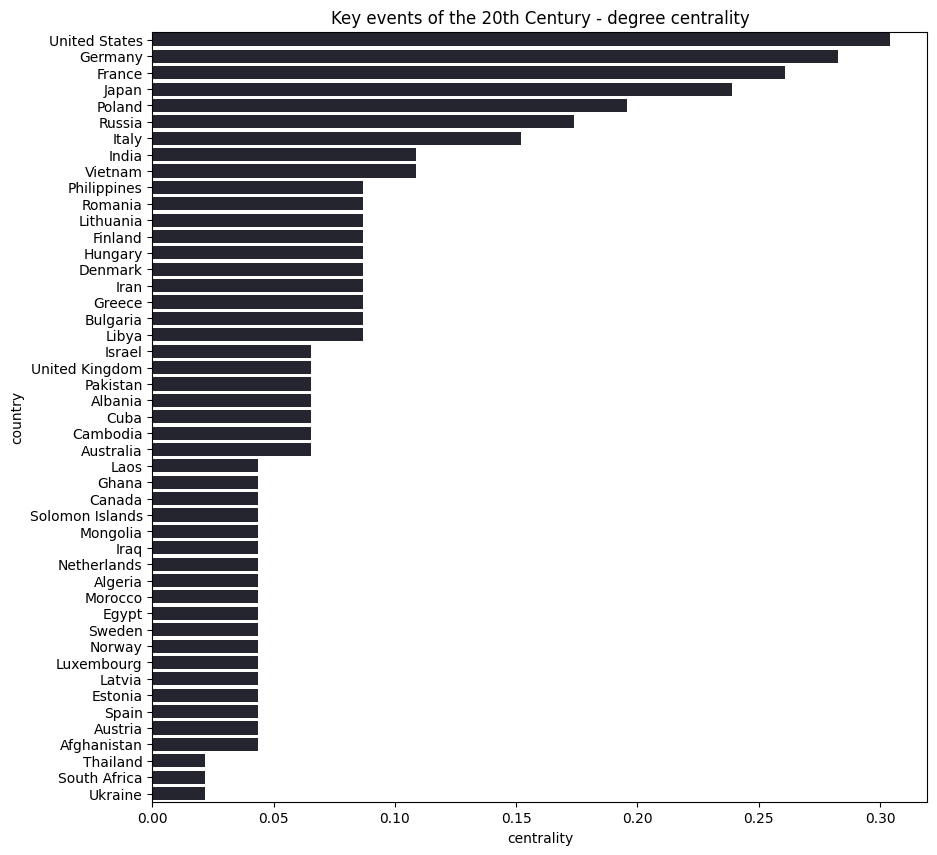

In [25]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("Key events of the 20th Century - degree centrality")

#### An observation I can make from this graph is that the United States, Germany, France, Japan, and Poland have the most degree of centrality compared to other countries. This makes since historically because all of these countries were involved a lot during World War II, and the text contains a lot of information on World War II since it was a key event of the 20th century. 

### Closeness centrality

In [26]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

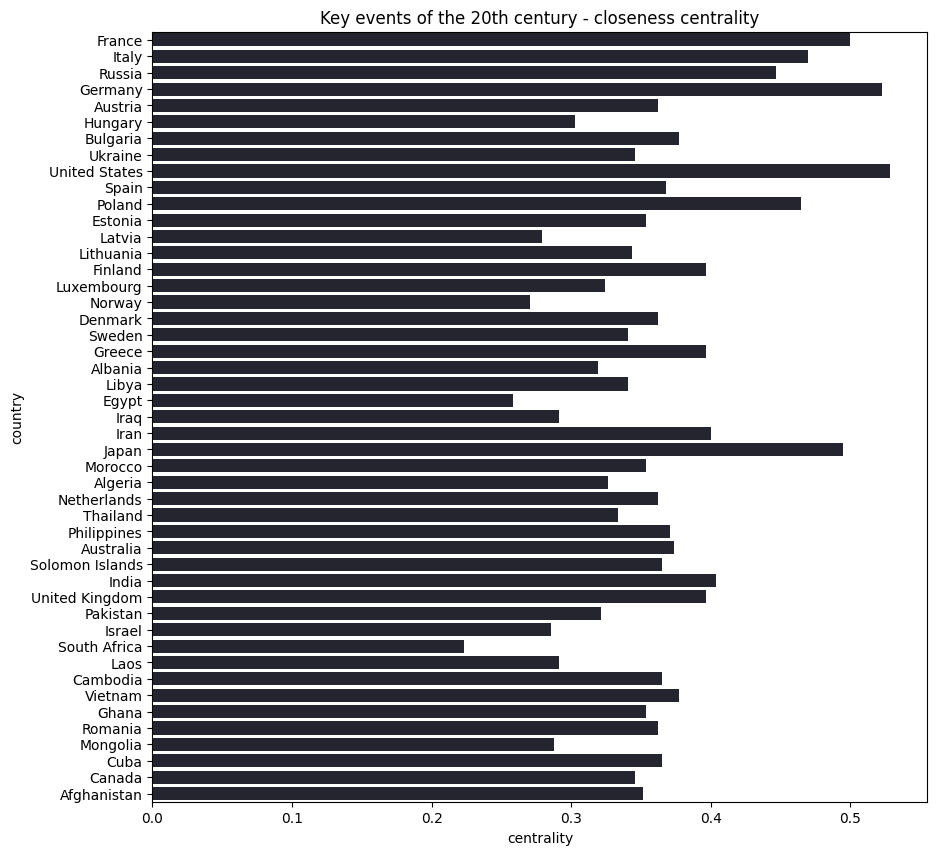

In [27]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("Key events of the 20th century - closeness centrality")

#### An observation I can make from the graph above is that Japan, United States, Germany, France, and Italy have some of the highest closeness centrality compared to other countries. I also noticed that most of these countries that have the highest closeness centrality also have the highest degree centrality with the exception of Italy. 

### Betweeness centrality

In [28]:
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [29]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

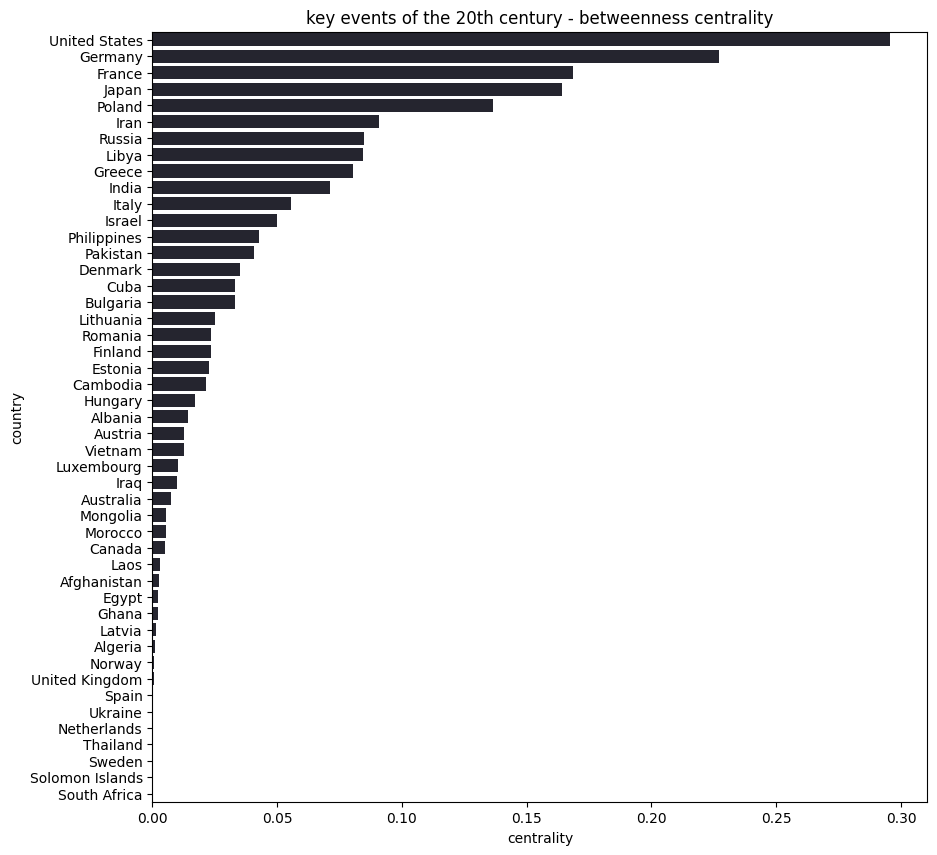

In [30]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweennes_df).set_title("key events of the 20th century - betweenness centrality")

#### Similar to the observations I made for the degree and closeness centrality, betweeness centrality also shares some similar data. The top countries with the highest betweeness centrality are United States, Germany, France, Japan, and Poland. However, a major difference I noticed in the graph from the previous graph is that in this graph, rarely any countries share the same betweeness cenntrality as one another. In the previous graphs most countries had the same centrality as other countries. In this graph, the countries that share similar centrality are Russia and Libya, Cuba and Bulgaria, Romania and Finland, and Austria and Vietnam. Another difference I noticed that makes this graph different from the others is that some countries such as Spain, Ukraine, Netherlands, and South Africa have no betweeness centrality. 